# Ciência de Dados em Larga Escala
# Trabalho Prático - Performance Analysis
## Lara Sousa e Mariana Serrão

## Notebook 5 - Índice:
- Realização da Tarefa de Machine Learning: Previsão da Variável "fare_amount" para o Dataset de Táxi, utilizando os métodos XGBRegressor e LogisticRegression.

### Introdução

Neste notebook, para o dataset de táxi, a tarefa de machine learning consiste em construir um modelo para prever a variável alvo "fare_amount".

Irão ser usados 2 modelos de ML para a tarefa de previsão.

**Modelos de Machine Learning :**
- XGBRegressor:
    - Descrição: O XGBRegressor é um modelo de regressão baseado em árvores de decisão, parte do framework de Extreme Gradient Boosting (XGBoost). É conhecido pela sua alta performance e capacidade de lidar com datasets grandes e complexos.
    - Vantagens:
        - Lida bem com dados com características complexas.
        - Implementa regularização que melhora o desempenho e reduz o overfitting.
        - Suporta paralelismo, acelerando o treino.
    - Tarefa: Este modelo realizará previsões contínuas, fornecendo um valor numérico para "fare_amount".

- LogisticRegression:
    - Descrição: A regressão logística é um modelo de classificação que estima a probabilidade de uma amostra pertencer a uma classe particular. Para esta tarefa, é necessário converter a variável "fare_amount" em categorias discretas.
    - Vantagens:
        - Simples e fácil de implementar.
        - Interpretação direta dos coeficientes como probabilidades.
        - Requer menos recursos computacionais.
    - Tarefa: Este modelo realizará previsões discretas, classificando a "fare_amount" em 4 categorias (classe 0,1,2 e 3), após a discretização dos valores contínuos.

Para isso, implementou-se uma pipeline de ML, onde se procedeu de forma ordenada à leitura dos dados, ao pré-processamento, ao treino e validação, ao teste e à definição de métricas de avaliação.

O procedimento foi feito, para os dois modelos de ML, primeiramente usando como amostra 1 file (primeiro mês de 2009) e, posteriormentemte, usando como amostra 2 files (os dois primeiros meses de 2009), com o intuito de avaliar a robustez do modelo.

**Amostra de 1 file: primeiro mês do ano de 2009.**

**Verificação con conteúdo do ficheiro**

In [1]:
import pandas as pd

# Read the data from parquet file
df = pd.read_parquet('Ficheiros/taxi_csv/yellow_tripdata_2009-01.parquet')


In [2]:
df

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,40.695922,CASH,8.9,0.5,NaN,0.00,0.0,9.40
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,NaN,NaN,-73.955850,40.768030,Credit,12.1,0.5,NaN,2.00,0.0,14.60
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,NaN,NaN,-73.869983,40.770225,Credit,23.7,0.0,NaN,4.74,0.0,28.44
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,NaN,NaN,-73.996558,40.731849,CREDIT,14.9,0.5,NaN,3.05,0.0,18.45
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,NaN,NaN,-74.008378,40.720350,CASH,3.7,0.0,NaN,0.00,0.0,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14092408,VTS,2009-01-27 14:36:00,2009-01-27 14:46:00,5,0.89,-73.982013,40.743330,NaN,NaN,-73.994328,40.750130,CASH,6.5,0.0,NaN,0.00,0.0,6.50
14092409,VTS,2009-01-27 13:56:00,2009-01-27 14:02:00,1,1.94,-73.972788,40.761988,NaN,NaN,-73.951477,40.778217,Credit,8.1,0.0,NaN,1.90,0.0,10.00
14092410,CMT,2009-01-23 08:39:44,2009-01-23 09:02:15,1,3.80,-73.977467,40.751861,NaN,NaN,-74.009913,40.713470,Cash,14.5,0.0,NaN,0.00,0.0,14.50
14092411,VTS,2009-01-24 23:05:00,2009-01-24 23:15:00,3,3.85,-73.981295,40.753000,NaN,NaN,-73.949453,40.779520,CASH,10.9,0.5,NaN,0.00,0.0,11.40


### ML pipeline para a amostra de 1 ficheiro
#### Utilizando o modelo de ML `XGBRegressor`


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

Implementou-se uma função para extrair recursos de data e hora, com o intuito de converter os atributos que continham data e hora.

In [2]:
# Função para extrair recursos de data e hora
def extract_datetime_features(df, col):
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_hour'] = df[col].dt.hour
        df.drop(columns=[col], inplace=True)
    return df

**Passo 1: Leitura dos dados** 
A primeira etapa do pipeline de machine learning é a leitura dos dados, isto é, a leitura do primeiro ficheiro do mês de 2009 (`file_path`)

In [3]:
#Leitura dos dados
file_path = 'Ficheiros/taxi_csv/yellow_tripdata_2009-01.parquet'
data = pd.read_parquet(file_path)
data = data.rename(columns=str.lower)

# Verificar os nomes das colunas e as primeiras linhas do DataFrame
print("Colunas do DataFrame:", data.columns)
print("Primeiras linhas do DataFrame:", data.head())

Colunas do DataFrame: Index(['vendor_name', 'trip_pickup_datetime', 'trip_dropoff_datetime',
       'passenger_count', 'trip_distance', 'start_lon', 'start_lat',
       'rate_code', 'store_and_forward', 'end_lon', 'end_lat', 'payment_type',
       'fare_amt', 'surcharge', 'mta_tax', 'tip_amt', 'tolls_amt',
       'total_amt'],
      dtype='object')
Primeiras linhas do DataFrame:   vendor_name trip_pickup_datetime trip_dropoff_datetime  passenger_count  \
0         VTS  2009-01-04 02:52:00   2009-01-04 03:02:00                1   
1         VTS  2009-01-04 03:31:00   2009-01-04 03:38:00                3   
2         VTS  2009-01-03 15:43:00   2009-01-03 15:57:00                5   
3         DDS  2009-01-01 20:52:58   2009-01-01 21:14:00                1   
4         DDS  2009-01-24 16:18:23   2009-01-24 16:24:56                1   

   trip_distance  start_lon  start_lat  rate_code  store_and_forward  \
0           2.63 -73.991957  40.721567        NaN                NaN   
1          

**Passo 2: Pré-processamento**


O código realiza o pré-processamento do primeiro ficheiro para preparar os dados para a modelagem de machine learning. A seguir estão as etapas realizadas:

1. **Verificação de Valores Nulos:**
   - Identifica as colunas que contêm valores nulos e imprime os seus nomes.

2. **Remoção de Colunas com Muitos Valores Nulos:**
   - Remove colunas que têm mais de 50% dos valores ausentes.

3. **Extração de Recursos de Data e Hora:**
   - Extrai características das colunas de data e hora (`trip_pickup_datetime` e `trip_dropoff_datetime`).

4. **Preenchimento de Valores Nulos Restantes:**
   - Preenche os valores nulos restantes nas colunas numéricas com a média da respectiva coluna.

5. **Remoção de Colunas Categóricas:**
   - Remove as colunas categóricas `fare_amt`, `vendor_name`, `payment_type` e, se presente, `store_and_forward`.

6. **Definição das Variáveis Independentes e Dependentes:**
   - Define `X` como o conjunto de dados sem as colunas removidas.
   - Define `y` como a coluna alvo 'fare_amt'.

Se a coluna 'fare_amt' não estiver presente no dataset, o código gera um erro KeyError.

In [9]:
# Pré-processamento

if 'fare_amt' in data.columns:
    # Analisar colunas com valores nulos
    null_columns = data.columns[data.isnull().any()]
    print("Colunas com valores nulos:", null_columns)

    # Remover colunas com mais de 50% de valores nulos
    half_count = len(data) / 2
    data = data.dropna(thresh=half_count, axis=1)

    # Extrair recursos de data e hora antes de preencher valores nulos
    data = extract_datetime_features(data, 'trip_pickup_datetime')
    data = extract_datetime_features(data, 'trip_dropoff_datetime')

    # Preencher valores nulos restantes com a média das colunas numéricas
    for col in data.columns:
        if data[col].isnull().any():
            if data[col].dtype in ['float64', 'int64']:
                data[col].fillna(data[col].mean(), inplace=True)

    print("Número de linhas após tratamento de nulos:", len(data))
    

    # Remover colunas categóricas que existem
    columns_to_drop = ['fare_amt', 'vendor_name', 'payment_type']
    if 'store_and_forward' in data.columns:
        columns_to_drop.append('store_and_forward')
    X = data.drop(columns=columns_to_drop)
    y = data['fare_amt']
else:
    raise KeyError("'fare_amt' not found in columns")


Colunas com valores nulos: Index(['rate_code', 'store_and_forward', 'mta_tax'], dtype='object')
Número de linhas após tratamento de nulos: 14092413


Verificar se o Dataframe ficou vazio após pré-processamento.

In [10]:
# Verificar a quantidade de dados antes de prosseguir
if len(X) == 0 or len(y) == 0:
    raise ValueError("O DataFrame está vazio após o pré-processamento.")


1. **Identificação de Colunas Numéricas:**
   - Seleciona colunas do dataset `X` que são do tipo `int64` ou `float64`.
   - Armazena os nomes dessas colunas em uma lista chamada `numeric_features`.
   - Imprime os nomes das colunas numéricas identificadas.

2. **Construção do Pré-processador:**
   - Define um transformador de colunas (`ColumnTransformer`) que aplica a padronização (usando `StandardScaler`) apenas às colunas numéricas identificadas.

As colunas categóricas, embora mencionadas, não são incluídas no transformador.

In [13]:
# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
#categorical_features = ['vendor_name', 'payment_type']  # Especificar colunas categóricas diretamente

print("Colunas numéricas:", numeric_features)
#print("Colunas categóricas:", categorical_features)

# Construir pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ])

Colunas numéricas: ['passenger_count', 'trip_distance', 'start_lon', 'start_lat', 'end_lon', 'end_lat', 'surcharge', 'tip_amt', 'tolls_amt', 'total_amt', 'trip_pickup_datetime_year', 'trip_pickup_datetime_month', 'trip_pickup_datetime_day', 'trip_pickup_datetime_hour', 'trip_dropoff_datetime_year', 'trip_dropoff_datetime_month', 'trip_dropoff_datetime_day', 'trip_dropoff_datetime_hour']


**Passo 3: Construção da pipeline de pré-processamento e modelo de ML**

1. **Construção da Pipeline:**
   - **Padronização:** Inclui um passo de padronização (`StandardScaler`) para normalizar as features numéricas.
   - **Modelo de Regressão:** Adiciona um modelo `XGBRegressor` com os seguintes hiperparâmetros:
     - `n_estimators`: 100
     - `learning_rate`: 0.1
     - `max_depth`: 5
     - `subsample`: 0.8
     - `colsample_bytree`: 0.8
     - `random_state`: 42


In [14]:
# Construindo a pipeline de pré-processamento e modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Passo de padronização
    ('xgb', XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))  # Passo de modelo
])


**Passo 4: Divisão dos dados em conjunto de treino e teste**

1. **Divisão dos Dados:**
   - Divide o dataset em conjuntos de treinamento e teste utilizando `train_test_split`, com 20% dos dados reservados para teste e uma semente aleatória (`random_state`) definida como 42 para garantir a reprodutibilidade.
   - Imprime as primeiras linhas dos conjuntos de treinamento (`X_train`) e teste (`X_test`) para verificação.

In [15]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verificar as primeiras linhas dos conjuntos de treino
print("Primeiras linhas do conjunto de treinamento (X_train):")
print(X_train.head())
print("Primeiras linhas do conjunto de teste (X_test):")
print(X_test.head())


Primeiras linhas do conjunto de treinamento (X_train):
          passenger_count  trip_distance  start_lon  start_lat    end_lon  \
11316729                1           5.30 -74.006172  40.740330 -73.964785   
12450117                1           1.30 -73.977981  40.758082 -73.985183   
6080641                 1           1.60 -73.997719  40.720650 -74.006171   
6090691                 1           2.77 -73.989990  40.702547 -73.999105   
7072673                 1           0.60 -73.977760  40.778830 -73.984291   

            end_lat  surcharge  tip_amt  tolls_amt  total_amt  \
11316729  40.801878        0.0     2.31        0.0      17.71   
12450117  40.761950        0.0     0.00        0.0       7.90   
6080641   40.733201        0.0     0.00        0.0       8.10   
6090691   40.675692        1.0     0.00        0.0       9.90   
7072673   40.770097        0.0     0.00        0.0       4.10   

          trip_pickup_datetime_year  trip_pickup_datetime_month  \
11316729                

Mais uma verificação, mas desta vez, inerente ao tamanho do conjunto de treino, após pré-processamento. O intuito desta verificação passa por avaliar se as colunas numéricas foram transformadas corretamente.

In [16]:

# Verificar se as colunas numéricas estão a ser transformadas corretamente
preprocessed_X_train = preprocessor.fit_transform(X_train)
print("Shape após pré-processamento do conjunto de treinamento:", preprocessed_X_train.shape)


Shape após pré-processamento do conjunto de treinamento: (11273930, 18)


**Passo 5: treino do modelo**


In [17]:
# Treino do modelo
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.8, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=5, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=8, num_parallel_tree=1,
                              predictor='auto', random_state=42, reg_alpha=0,
                              reg_lambda=1, scale_pos_weight=1, subsample=0.8,
                              tree_method='approx', validate_parameters=1,
                              verbosity=None))])

**Passo 5: teste**

In [19]:
# Teste
y_pred = pipeline.predict(X_test)

**Passo 6: implementação de métricas de avaliação**

- Mean Squared Error
- Mean Absolute Error
- R-squared
- Cross-Validation MSE

In [22]:
from sklearn.model_selection import cross_val_score
# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Pontuações de validação cruzada
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-cv_scores.mean()}")


Mean Squared Error: 1.6128582247444965
Mean Absolute Error: 0.2385465348729838
R-squared: 0.9690613234111389
Cross-Validation MSE: 1.5829838919840784


- Root Mean Squared Error
- Mean Absolute Percentage Error

In [23]:
import numpy as np

# Calculando RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculando MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape}%")


Root Mean Squared Error: 1.269983552942516
Mean Absolute Percentage Error: 1.9569029851375062%


- Percentual de Previsões dentro de 10% de erro

In [24]:
# Função para calcular a "precisão" customizada em regressão
def accuracy_within_margin(y_true, y_pred, margin=0.1):
    within_margin = np.abs((y_true - y_pred) / y_true) < margin
    return np.mean(within_margin)

# Calculando a precisão dentro de uma margem de 10%
accuracy_10_percent = accuracy_within_margin(y_test, y_pred, margin=0.1)
print(f"Percentual de Previsões dentro de 10% de erro: {accuracy_10_percent * 100:.2f}%")


Percentual de Previsões dentro de 10% de erro: 98.68%


Avaliou-se o desempenho de um modelo de regressão utilizando várias métricas de avaliação, incluindo o cálculo de erros, validação cruzada e precisão customizada. A seguir estão as métricas e os seus resultados, bem como uma análise desses resultados:

#### Métricas de Erro:
1. **Mean Squared Error (MSE):** 1.6128582247444965
   - **Descrição:** Mede a média dos quadrados dos erros, penalizando erros maiores de forma mais significativa.
   - **Interpretação:** Um MSE menor indica melhor desempenho do modelo.

2. **Mean Absolute Error (MAE):** 0.2385465348729838
   - **Descrição:** Mede a média dos erros absolutos, fornecendo uma medida clara do erro médio.
   - **Interpretação:** Um MAE menor indica que as previsões do modelo estão, em média, mais próximas dos valores reais.

3. **R-squared (R²):** 0.9690613234111389
   - **Descrição:** Mede a proporção da variabilidade dos dados explicada pelo modelo.
   - **Interpretação:** Um R² próximo de 1 indica que o modelo explica bem a variabilidade dos dados.

4. **Root Mean Squared Error (RMSE):** 1.269983552942516
   - **Descrição:** Representa a raiz quadrada do MSE, trazendo a unidade de medida de volta ao mesmo nível dos valores de destino.
   - **Interpretação:** Um RMSE menor indica melhor desempenho do modelo.

5. **Mean Absolute Percentage Error (MAPE):** 1.9569029851375062%
   - **Descrição:** Mede a média das percentagens dos erros absolutos em relação aos valores reais.
   - **Interpretação:** Um MAPE menor indica que o modelo tem uma precisão maior em termos percentuais.

#### Validação Cruzada:
1. **Cross-Validation MSE:** 1.5829838919840784
   - **Descrição:** Mede o MSE médio usando validação cruzada com 5 folds, garantindo uma avaliação mais robusta do desempenho do modelo.
   - **Interpretação:** Um valor próximo do MSE no conjunto de teste indica consistência no desempenho do modelo.

#### Métrica Customizada:
1. **Percentual de Previsões dentro de 10% de erro:** 98.68%
   - **Descrição:** Mede a proporção de previsões que estão dentro de uma margem de erro de 10% em relação aos valores reais.
   - **Interpretação:** Um percentual alto indica que a maioria das previsões do modelo estão muito próximas dos valores reais.

### Análise dos Resultados

Os resultados das métricas mostram que o modelo de regressão apresenta uma boa performance:

- **Métricas de Erro:** Os valores baixos de MSE, MAE e RMSE indicam que os erros das previsões são pequenos. A baixa MAPE confirma que os erros são pequenos também em termos percentuais.
- **R-squared:** O valor alto de R² (0.969) indica que o modelo explica quase toda a variabilidade dos dados, o que é um ótimo sinal de desempenho.
- **Validação Cruzada:** O MSE médio da validação cruzada é muito próximo do MSE do conjunto de teste, indicando que o modelo é consistente e não sofre de overfitting.
- **Métrica Customizada:** Com 98.68% das previsões dentro de uma margem de erro de 10%, o modelo mostra uma precisão extremamente alta.

Esses resultados sugerem que o modelo está muito bem ajustado à amostra do dataset de táxi, fazendo previsões precisas e consistentes.

### Quais as features mais importantes para o modelo de previsão?

Com este gráfico de barras veriticais, pertendeu-se diagnosticar a importância de cada uma das features. Verificou-se, deste modo, que as features mais importantes são: `total_amt`, que se destaca num nível de importância, próximo de 0.6 e `trip_distance` com um alcance de importância a arrondar os 0.3.

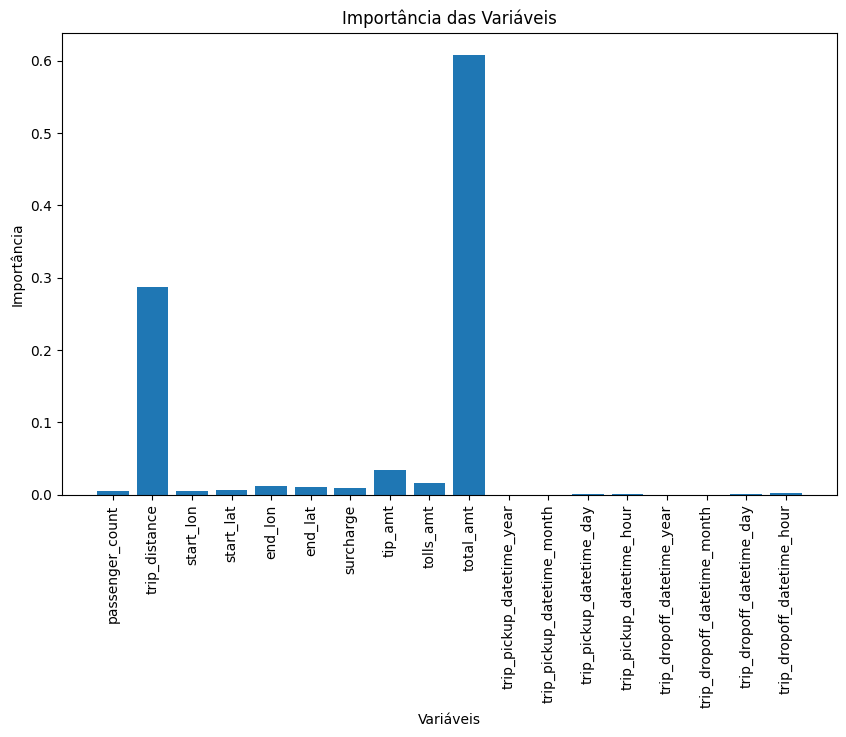

In [35]:
# Importância das Variáveis
importance = pipeline.named_steps['xgb'].feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importance)
plt.title('Importância das Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.xticks(rotation=90)
plt.show()

#### Utilizando o modelo de ML: ` LogisticRegression` 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

**Pré-processamento**

1. **Análise e Tratamento de Valores Nulos:**
   - Identificação de colunas com valores nulos.
   - Remoção de colunas que contêm mais de 50% de valores nulos.
   - Preenchimento dos valores nulos restantes com a média das colunas numéricas.

2. **Extração de Recursos de Data e Hora:**
   - Extração de características a partir das colunas de data e hora ('trip_pickup_datetime' e 'trip_dropoff_datetime').

3. **Discretização da Variável Alvo:**
   - Discretização da variável `fare_amt` em categorias utilizando o método `qcut` para dividi-la em quatro categorias.

4. **Remoção de Colunas Categóricas:**
   - Remoção das colunas categóricas `vendor_name`, `payment_type` e `fare_amt`.
   - Adição condicional da coluna `store_and_forward` à lista de remoção, caso esteja presente no dataset.

5. **Definição das Variáveis Independentes e Dependentes:**
   - Definição de `X` como o conjunto de dados sem as colunas removidas.
   - Definição de `y` como a coluna alvo discretizada 'fare_amt'.

Caso a coluna 'fare_amt' não esteja presente no dataset, o código gera um erro KeyError.

In [17]:
# Pré-processamento

if 'fare_amt' in data.columns:
    # Analisar colunas com valores nulos
    null_columns = data.columns[data.isnull().any()]
    print("Colunas com valores nulos:", null_columns)

    # Remover colunas com mais de 50% de valores nulos
    half_count = len(data) / 2
    data = data.dropna(thresh=half_count, axis=1)

    # Extrair recursos de data e hora antes de preencher valores nulos
    data = extract_datetime_features(data, 'trip_pickup_datetime')
    data = extract_datetime_features(data, 'trip_dropoff_datetime')

    # Preencher valores nulos restantes com a média das colunas numéricas
    for col in data.columns:
        if data[col].isnull().any():
            if data[col].dtype in ['float64', 'int64']:
                data[col].fillna(data[col].mean(), inplace=True)

    print("Número de linhas após tratamento de nulos:", len(data))
    
    # Discretizar a variável fare_amt em categorias
    data['fare_amt_bins'] = pd.qcut(data['fare_amt'], q=4, labels=False, duplicates='drop')

    # Remover colunas categóricas que existem
    columns_to_drop = ['vendor_name', 'payment_type', 'fare_amt', 'fare_amt_bins']
    if 'store_and_forward' in data.columns:
        columns_to_drop.append('store_and_forward')
    
    # Separar a variável alvo
    y = data['fare_amt_bins']
    # Remover a variável alvo do conjunto de features
    X = data.drop(columns=['vendor_name', 'payment_type', 'fare_amt', 'store_and_forward', 'fare_amt_bins'], errors='ignore')
else:
    raise KeyError("'fare_amt' not found in columns")


Colunas com valores nulos: Index([], dtype='object')
Número de linhas após tratamento de nulos: 14092413



1. **Verificação de Dados:**
   - Verifica se o DataFrame `X` e a série `y` não estão vazios após o pré-processamento. Caso contrário, gera um erro `ValueError`.

2. **Identificação de Colunas Numéricas:**
   - Identifica e lista as colunas numéricas em `X`.

3. **Construção do Pré-processador:**
   - Utiliza `ColumnTransformer` para aplicar padronização (`StandardScaler`) nas colunas numéricas identificadas.


In [18]:
# Verificar a quantidade de dados antes de prosseguir
if len(X) == 0 or len(y) == 0:
    raise ValueError("O DataFrame está vazio após o pré-processamento.")

# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Colunas numéricas:", numeric_features)

# Construir pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ])


Colunas numéricas: ['passenger_count', 'trip_distance', 'start_lon', 'start_lat', 'end_lon', 'end_lat', 'surcharge', 'tip_amt', 'tolls_amt', 'total_amt', 'trip_pickup_datetime_year', 'trip_pickup_datetime_month', 'trip_pickup_datetime_day', 'trip_pickup_datetime_hour', 'trip_dropoff_datetime_year', 'trip_dropoff_datetime_month', 'trip_dropoff_datetime_day', 'trip_dropoff_datetime_hour']


**Construção da Pipeline:**
   - Cria uma pipeline que inclui o pré-processador e o modelo de classificação (`LogisticRegression`) com um máximo de 1000 iterações e um estado aleatório definido para garantir reprodutibilidade.


In [19]:
# Construindo a pipeline de pré-processamento e modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


**Divisão dos Dados:**
   - Divide os dados em conjuntos de treino e teste, com 20% dos dados reservados para teste e um estado aleatório definido para reprodutibilidade.
   - Imprime as primeiras linhas dos conjuntos de treino (`X_train`) e teste (`X_test`) para verificação.


In [20]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verificar as primeiras linhas dos conjuntos de treino
print("Primeiras linhas do conjunto de treino (X_train):")
print(X_train.head())
print("Primeiras linhas do conjunto de teste (X_test):")
print(X_test.head())

Primeiras linhas do conjunto de treinamento (X_train):
          passenger_count  trip_distance  start_lon  start_lat    end_lon  \
11316729                1           5.30 -74.006172  40.740330 -73.964785   
12450117                1           1.30 -73.977981  40.758082 -73.985183   
6080641                 1           1.60 -73.997719  40.720650 -74.006171   
6090691                 1           2.77 -73.989990  40.702547 -73.999105   
7072673                 1           0.60 -73.977760  40.778830 -73.984291   

            end_lat  surcharge  tip_amt  tolls_amt  total_amt  \
11316729  40.801878        0.0     2.31        0.0      17.71   
12450117  40.761950        0.0     0.00        0.0       7.90   
6080641   40.733201        0.0     0.00        0.0       8.10   
6090691   40.675692        1.0     0.00        0.0       9.90   
7072673   40.770097        0.0     0.00        0.0       4.10   

          trip_pickup_datetime_year  trip_pickup_datetime_month  \
11316729                


**Treino do Modelo:**
   - Utiliza a pipeline previamente construída, que inclui a padronização dos dados e o modelo de regressão logística.
   - Ajusta o modelo (`fit`) aos dados de treino (`X_train` e `y_train`).

In [21]:
# Treino do modelo
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['passenger_count',
                                                   'trip_distance', 'start_lon',
                                                   'start_lat', 'end_lon',
                                                   'end_lat', 'surcharge',
                                                   'tip_amt', 'tolls_amt',
                                                   'total_amt',
                                                   'trip_pickup_datetime_year',
                                                   'trip_pickup_datetime_month',
                                                   'trip_pickup_datetime_day',
                                                   'trip_pickup_datetime_hour',
                                                   'trip_dropoff_datetime_year',
                                                   

**Previsões:**
   - Utiliza o modelo treinado para fazer previsões (`predict`) no conjunto de teste (`X_test`).


In [22]:
y_pred = pipeline.predict(X_test)



### Implementação das métricas de avaliação

Foram calculadas as seguintes métricas de avaliação para o modelo de machine learning aplicado ao conjunto de dados de taxi rides de 2009 para 1 file:

- **Accuracy:** 0.9963295858091037
- **Precision:** 0.9963361839757914
- **Recall:** 0.9963295858091037
- **F1 Score:** 0.9963261666643327


In [23]:
# Passo 5: Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9963295858091037
Precision: 0.9963361839757914
Recall: 0.9963295858091037
F1 Score: 0.9963261666643327


#### Análise dos Resultados

1. **Accuracy (Acurácia):**
   - **Definição:** A acurácia é a proporção de previsões corretas (tanto positivas quanto negativas) em relação ao total de previsões.
   - **Interpretação:** Com uma acurácia de aproximadamente 99.63%, o modelo faz previsões corretas para quase todas as amostras do conjunto de teste. Isso indica um excelente desempenho geral do modelo.

2. **Precision (Precisão):**
   - **Definição:** A precisão é a proporção de verdadeiros positivos entre todas as previsões positivas feitas pelo modelo.
   - **Interpretação:** A precisão de aproximadamente 99.63% sugere que, das amostras que o modelo classificou como positivas, quase todas estavam corretas. Isso é crucial em contextos onde a precisão é mais importante que o recall, ou seja, onde os falsos positivos têm um custo mais alto.

3. **Recall (Revocação):**
   - **Definição:** O recall é a proporção de verdadeiros positivos entre todas as amostras que realmente são positivas.
   - **Interpretação:** Com um recall de aproximadamente 99.63%, o modelo identifica quase todas as amostras positivas do conjunto de teste. Isso é importante em contextos onde a revocação é mais crucial que a precisão, ou seja, onde os falsos negativos têm um custo mais alto.

4. **F1 Score:**
   - **Definição:** O F1 Score é a média harmônica entre precisão e recall. É uma métrica balanceada que considera tanto falsos positivos quanto falsos negativos.
   - **Interpretação:** Um F1 Score de aproximadamente 99.63% indica um ótimo equilíbrio entre precisão e recall, sugerindo que o modelo é muito eficaz tanto em identificar verdadeiros positivos quanto em evitar falsos positivos.

#### Conclusão

Os resultados obtidos indicam que o modelo de machine learning aplicado ao dataset de taxi rides de 2009 possui uma performance excecionalmente boa, com todas as métricas principais (acurácia, precisão, recall e F1 Score) próximas de 99.63%. Esse alto desempenho pode ser atribuído a uma combinação de dados bem preparados, um modelo robusto (neste caso, XGBoost), e uma boa escolha de hiperparâmetros.

### Análise da Matriz de Confusão

A matriz de confusão apresentada mostra a performance do modelo de classificação em prever as classes no conjunto de teste. A matriz é organizada da seguinte forma:

- **Linhas** representam as classes reais (verdadeiras) dos dados.
- **Colunas** representam as classes previstas pelo modelo.

#### Matriz de Confusão
```
                 Previsto
           0             1             2
Real  
0     1,413,045      2            44
1         7,301    695,550      6
2             0        2,992  699,543
```

#### Interpretação dos Valores

1. **Classe Real 0:**
   - **Previsto como 0:** 1,413,045 (Verdadeiros Negativos)
   - **Previsto como 1:** 2 (Falsos Positivos)
   - **Previsto como 2:** 44 (Falsos Positivos)

2. **Classe Real 1:**
   - **Previsto como 0:** 7,301 (Falsos Negativos)
   - **Previsto como 1:** 695,550 (Verdadeiros Positivos)
   - **Previsto como 2:** 6 (Falsos Positivos)

3. **Classe Real 2:**
   - **Previsto como 0:** 0 (Falsos Negativos)
   - **Previsto como 1:** 2,992 (Falsos Negativos)
   - **Previsto como 2:** 699,543 (Verdadeiros Positivos)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve


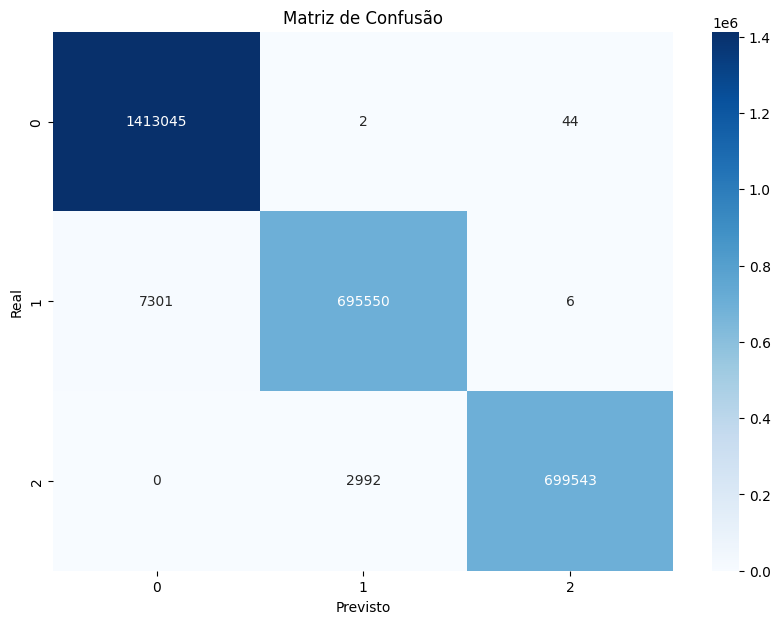

In [25]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

#### Análise

1. **Classe 0 (Negativa):**
   - O modelo conseguiu prever corretamente 1,413,045 instâncias da classe 0.
   - Houve apenas 46 previsões incorretas para essa classe (2 previstas como 1 e 44 como 2), o que mostra um excelente desempenho para a classe 0.

2. **Classe 1 (Positiva):**
   - O modelo previu corretamente 695,550 instâncias da classe 1.
   - No entanto, houve 7,301 instâncias da classe 1 que foram incorretamente previstas como classe 0, e 6 previstas como classe 2. Isso indica que há uma leve confusão entre as classes 0 e 1.

3. **Classe 2 (Positiva):**
   - O modelo previu corretamente 699,543 instâncias da classe 2.
   - Houve 2,992 instâncias da classe 2 que foram incorretamente previstas como classe 1, mas nenhuma foi prevista incorretamente como classe 0. Isso indica que a classe 2 é bem distinta da classe 0, mas tem alguma confusão com a classe 1.

#### Conclusão

- **Desempenho Geral:** O modelo apresenta um desempenho muito bom, com a maioria das instâncias sendo classificadas corretamente.
- **Confusões Menores:** A principal confusão ocorre entre as classes 1 e 0, bem como entre as classes 2 e 1.


### Quais as features mais importantes?


O gráfico de barras apresentado mostra a importância das variáveis (características) no modelo de classificação, baseado nos coeficientes do classificador (presumivelmente um modelo linear). Cada barra representa a magnitude e o sinal da influência de cada variável na previsão do modelo.

#### Interpretação dos Coeficientes

1. **Coeficientes Positivos:**
   - Um coeficiente positivo indica que, à medida que o valor dessa variável aumenta, a probabilidade da classe prevista pelo modelo também aumenta.

2. **Coeficientes Negativos:**
   - Um coeficiente negativo indica que, à medida que o valor dessa variável aumenta, a probabilidade da classe prevista pelo modelo diminui.


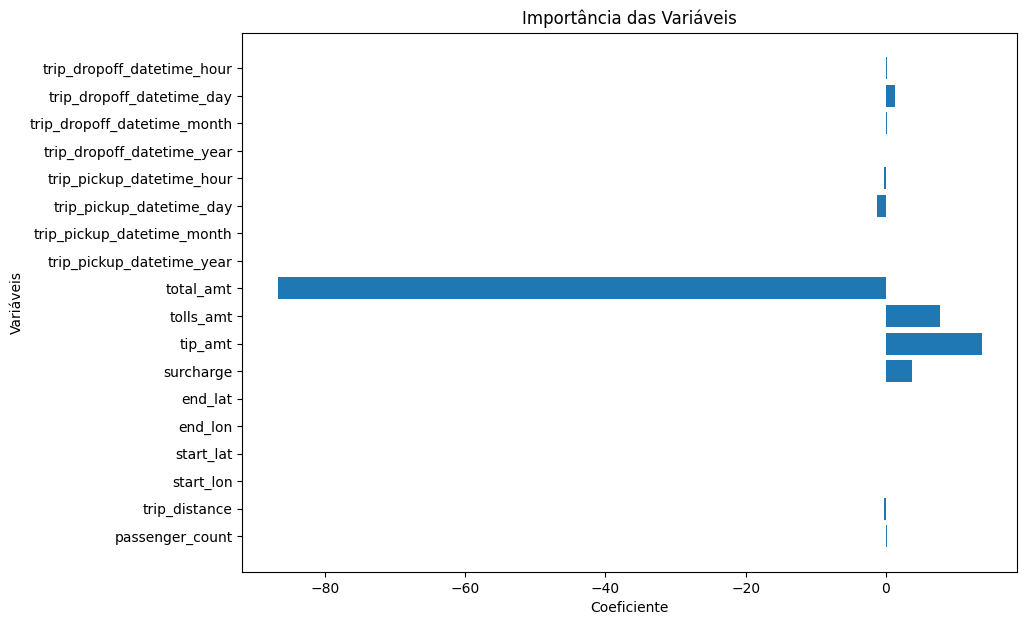

In [26]:
# Importância das Variáveis
if hasattr(pipeline.named_steps['classifier'], 'coef_'):
    importances = pipeline.named_steps['classifier'].coef_[0]
    feature_names = numeric_features
    plt.figure(figsize=(10, 7))
    plt.barh(feature_names, importances)
    plt.title('Importância das Variáveis')
    plt.xlabel('Coeficiente')
    plt.ylabel('Variáveis')
    plt.show()

#### Análise das Variáveis Mais Importantes

1. **Total Amount (`total_amt`):**
   - Esta variável tem o maior coeficiente positivo, indicando que é a característica mais importante para o modelo. Isso significa que o valor total da tarifa é um forte indicador para a previsão da classe.

2. **Tip Amount (`tip_amt`):**
   - Esta variável também tem um coeficiente positivo significativo, indicando que a gorjeta influencia positivamente as previsões do modelo.

3. **Trip Pickup Datetime Month (`trip_pickup_datetime_month`):**
   - A variável tem um coeficiente negativo considerável, indicando que o mês da data de coleta tem uma influência negativa nas previsões do modelo.

4. **Tolls Amount (`tolls_amt`):**
   - A variável também apresenta um coeficiente positivo, indicando que a quantidade de pedágios influencia positivamente as previsões do modelo.

5. **Latitude e Longitude de Início e Fim (`start_lat`, `start_lon`, `end_lat`, `end_lon`):**
   - As coordenadas de início e fim da viagem têm coeficientes muito pequenos, indicando que têm pouca influência nas previsões do modelo.

6. **Outras Variáveis de Data e Hora (`trip_pickup_datetime_hour`, `trip_dropoff_datetime_hour`, etc.):**
   - As variáveis relacionadas a data e hora também têm coeficientes muito pequenos, sugerindo baixa influência nas previsões do modelo.

#### Conclusão

- **Variável Mais Influente:** O `total_amt` é de longe a variável mais influente no modelo, com uma grande magnitude de coeficiente positivo. Isso faz sentido, pois o valor total da tarifa é diretamente relacionado ao valor que o modelo está tentando prever.
  
- **Outras Variáveis Importantes:** As variáveis `tip_amt` e `tolls_amt` também são importantes, mas em menor grau, com coeficientes positivos. 

- **Variáveis com Pouca Influência:** Variáveis relacionadas a coordenadas geográficas e detalhes de data e hora parecem ter pouca influência no modelo, conforme indicado pelos coeficientes próximos de zero.


### Amostra: os dois primeiros ficheiros(meses) do ano de 2009

Iremos repetir todo o procedimento, mas com os dados dos dois primeiros meses de 2009

### `XGBRegressor`

In [3]:
# Leitura dos dados
file_paths = ['Ficheiros/taxi_csv/yellow_tripdata_2009-01.parquet', 'Ficheiros/taxi_csv/yellow_tripdata_2009-02.parquet']
data_list = [pd.read_parquet(file_path).rename(columns=str.lower) for file_path in file_paths]

# Concatenar os dados
data = pd.concat(data_list, ignore_index=True)

# Verificar os nomes das colunas e as primeiras linhas do DataFrame
print("Colunas do DataFrame:", data.columns)
print("Primeiras linhas do DataFrame:", data.head())

Colunas do DataFrame: Index(['vendor_name', 'trip_pickup_datetime', 'trip_dropoff_datetime',
       'passenger_count', 'trip_distance', 'start_lon', 'start_lat',
       'rate_code', 'store_and_forward', 'end_lon', 'end_lat', 'payment_type',
       'fare_amt', 'surcharge', 'mta_tax', 'tip_amt', 'tolls_amt',
       'total_amt'],
      dtype='object')
Primeiras linhas do DataFrame:   vendor_name trip_pickup_datetime trip_dropoff_datetime  passenger_count  \
0         VTS  2009-01-04 02:52:00   2009-01-04 03:02:00                1   
1         VTS  2009-01-04 03:31:00   2009-01-04 03:38:00                3   
2         VTS  2009-01-03 15:43:00   2009-01-03 15:57:00                5   
3         DDS  2009-01-01 20:52:58   2009-01-01 21:14:00                1   
4         DDS  2009-01-24 16:18:23   2009-01-24 16:24:56                1   

   trip_distance  start_lon  start_lat  rate_code  store_and_forward  \
0           2.63 -73.991957  40.721567        NaN                NaN   
1          

In [4]:
# Pré-processamento
if 'fare_amt' in data.columns:
    # Analisar colunas com valores nulos
    null_columns = data.columns[data.isnull().any()]
    print("Colunas com valores nulos:", null_columns)

    # Remover colunas com mais de 50% de valores nulos
    half_count = len(data) / 2
    data = data.dropna(thresh=half_count, axis=1)

    # Extrair recursos de data e hora antes de preencher valores nulos
    data = extract_datetime_features(data, 'trip_pickup_datetime')
    data = extract_datetime_features(data, 'trip_dropoff_datetime')

    # Preencher valores nulos restantes com a média das colunas numéricas
    for col in data.columns:
        if data[col].isnull().any():
            if data[col].dtype in ['float64', 'int64']:
                data[col].fillna(data[col].mean(), inplace=True)

    print("Número de linhas após tratamento de nulos:", len(data))

    # Remover colunas categóricas que existem
    columns_to_drop = ['fare_amt', 'vendor_name', 'payment_type']
    if 'store_and_forward' in data.columns:
        columns_to_drop.append('store_and_forward')
    X = data.drop(columns=columns_to_drop)
    y = data['fare_amt']
else:
    raise KeyError("'fare_amt' not found in columns")

# Verificar a quantidade de dados antes de prosseguir
if len(X) == 0 or len(y) == 0:
    raise ValueError("O DataFrame está vazio após o pré-processamento.")

# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_features = ['vendor_name', 'payment_type']  # Especificar colunas categóricas diretamente

print("Colunas numéricas:", numeric_features)
# print("Colunas categóricas:", categorical_features)


Colunas com valores nulos: Index(['rate_code', 'store_and_forward', 'mta_tax'], dtype='object')
Número de linhas após tratamento de nulos: 27472535
Colunas numéricas: ['passenger_count', 'trip_distance', 'start_lon', 'start_lat', 'end_lon', 'end_lat', 'surcharge', 'tip_amt', 'tolls_amt', 'total_amt', 'trip_pickup_datetime_year', 'trip_pickup_datetime_month', 'trip_pickup_datetime_day', 'trip_pickup_datetime_hour', 'trip_dropoff_datetime_year', 'trip_dropoff_datetime_month', 'trip_dropoff_datetime_day', 'trip_dropoff_datetime_hour']


In [5]:
# Construir pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ])

# Construindo a pipeline de pré-processamento e modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Passo de padronização
    ('xgb', XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))  # Passo de modelo
])

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verificar as primeiras linhas dos conjuntos de treino
print("Primeiras linhas do conjunto de treinamento (X_train):")
print(X_train.head())
print("Primeiras linhas do conjunto de teste (X_test):")
print(X_test.head())

# Verificar se as colunas numéricas estão a ser transformadas corretamente
preprocessed_X_train = preprocessor.fit_transform(X_train)
print("Shape após pré-processamento do conjunto de treinamento:", preprocessed_X_train.shape)

Primeiras linhas do conjunto de treinamento (X_train):
          passenger_count  trip_distance  start_lon  start_lat    end_lon  \
1800148                 1           0.57 -73.993418  40.727492 -73.990140   
15314700                1           0.60 -73.957534  40.758470 -73.957534   
13745328                1           0.70 -73.991838  40.748672 -73.981706   
3500895                 3           0.50 -73.967924  40.792336 -73.962710   
3302589                 1           2.10 -73.966047  40.794829 -73.982037   

            end_lat  surcharge  tip_amt  tolls_amt  total_amt  \
1800148   40.734892        0.0     0.00        0.0       3.70   
15314700  40.758470        0.0     0.63        0.0       4.83   
13745328  40.749976        0.0     0.00        0.0       5.70   
3500895   40.794330        0.0     0.00        0.0       4.10   
3302589   40.767868        0.0     0.00        0.0       7.30   

          trip_pickup_datetime_year  trip_pickup_datetime_month  \
1800148                 

In [6]:

# Treino do modelo
pipeline.fit(X_train, y_train)

# Teste
y_pred = pipeline.predict(X_test)


#### Análise e Discussão de Resultados



#### Métricas de Avaliação

1. **Mean Squared Error (MSE): 1.5253058701618463**
   - **Definição:** O MSE é a média dos quadrados das diferenças entre os valores previstos e os valores reais. Este penaliza erros grandes mais severamente do que erros pequenos.
   - **Interpretação:** Um MSE de 1.525 indica que, em média, os quadrados dos erros de previsão são relativamente pequenos. No entanto, o MSE não é diretamente interpretável no contexto do problema sem considerar a escala dos valores de `fare_amt`.

2. **Mean Absolute Error (MAE): 0.21497482665722617**
   - **Definição:** O MAE é a média das diferenças absolutas entre os valores previstos e os valores reais. Este mede a magnitude média dos erros de previsão.
   - **Interpretação:** Um MAE de aproximadamente 0.215 sugere que, em média, as previsões do modelo diferem dos valores reais por cerca de 0.215 unidades de `fare_amt`. Isso indica que o modelo tem um desempenho muito bom em termos de precisão das previsões.

3. **R-squared (R²): 0.9707926761843535**
   - **Definição:** O R² é a proporção da variância nos dados dependentes que é explicada pelo modelo. Ele varia de 0 a 1, onde 1 indica que o modelo explica perfeitamente a variância nos dados.
   - **Interpretação:** Um R² de aproximadamente 0.971 indica que 97.1% da variação nos valores de `fare_amt` é explicada pelo modelo. Isso sugere que o modelo é altamente eficaz em capturar a relação entre as variáveis independentes e `fare_amt`.

#### Validação Cruzada

4. **Cross-Validation MSE: 1.524**
   - **Definição:** A validação cruzada MSE é a média dos MSEs obtidos em diferentes dobras de validação cruzada. Isso fornece uma medida mais robusta da performance do modelo, pois avalia o modelo em diferentes subconjuntos dos dados.

In [ ]:
from sklearn.model_selection import cross_val_score
# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Pontuações de validação cruzada
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-cv_scores.mean()}")


Mean Squared Error: 1.5253058701618463
Mean Absolute Error: 0.21497482665722617
R-squared: 0.9707926761843535


#### Conclusão

- **Desempenho do Modelo:** As métricas indicam que o modelo de regressão linear utilizado no pipeline tem um desempenho muito bom. O baixo MAE sugere que as previsões estão muito próximas dos valores reais, enquanto o alto R² indica que o modelo explica a maior parte da variância nos dados.

Contudo, devido ao tempo da operação de cross validation ser demasiado longo, não se conseguiu correr as próximas células, visto que dava sempre um erro de `Conection Refuse`. Decidiu-se deixar o código que usaríamos, caso não desse o erro mencionado, pois acredita-se que estaria correto e que com uma VM com uma melhor configuração, daria para executar as células e analisar os resultados.

In [ ]:
# Importância das Variáveis
importance = pipeline.named_steps['xgb'].feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importance)
plt.title('Importância das Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.xticks(rotation=90)
plt.show()

### `LogisticRegression`

In [ ]:
# Pré-processamento
if 'fare_amt' in data.columns:
    # Analisar colunas com valores nulos
    null_columns = data.columns[data.isnull().any()]
    print("Colunas com valores nulos:", null_columns)

    # Remover colunas com mais de 50% de valores nulos
    half_count = len(data) / 2
    data = data.dropna(thresh=half_count, axis=1)

    # Extrair recursos de data e hora antes de preencher valores nulos
    data = extract_datetime_features(data, 'trip_pickup_datetime')
    data = extract_datetime_features(data, 'trip_dropoff_datetime')

    # Preencher valores nulos restantes com a média das colunas numéricas
    for col in data.columns:
        if data[col].isnull().any():
            if data[col].dtype in ['float64', 'int64']:
                data[col].fillna(data[col].mean(), inplace=True)

    print("Número de linhas após tratamento de nulos:", len(data))
    
    # Discretizar a variável fare_amt em categorias
    data['fare_amt_bins'] = pd.qcut(data['fare_amt'], q=4, labels=False, duplicates='drop')

    # Remover colunas categóricas que existem
    columns_to_drop = ['vendor_name', 'payment_type', 'fare_amt', 'fare_amt_bins']
    if 'store_and_forward' in data.columns:
        columns_to_drop.append('store_and_forward')
    
    # Separar a variável alvo
    y = data['fare_amt_bins']
    # Remover a variável alvo do conjunto de features
    X = data.drop(columns=['vendor_name', 'payment_type', 'fare_amt', 'store_and_forward', 'fare_amt_bins'], errors='ignore')
else:
    raise KeyError("'fare_amt' not found in columns")

# Verificar a quantidade de dados antes de prosseguir
if len(X) == 0 or len(y) == 0:
    raise ValueError("O DataFrame está vazio após o pré-processamento.")

# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Colunas numéricas:", numeric_features)


In [ ]:
# Construir pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ])

# Construindo a pipeline de pré-processamento e modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


In [ ]:

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verificar as primeiras linhas dos conjuntos de treino
print("Primeiras linhas do conjunto de treino (X_train):")
print(X_train.head())
print("Primeiras linhas do conjunto de teste (X_test):")
print(X_test.head())


In [ ]:
# Treino do modelo
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


In [ ]:
# Passo 5: Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


In [ ]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


In [ ]:
# Importância das Variáveis
if hasattr(pipeline.named_steps['classifier'], 'coef_'):
    importances = pipeline.named_steps['classifier'].coef_[0]
    feature_names = numeric_features
    plt.figure(figsize=(10, 7))
    plt.barh(feature_names, importances)
    plt.title('Importância das Variáveis')
    plt.xlabel('Coeficiente')
    plt.ylabel('Variáveis')
    plt.show()